# Exploration

In [1]:
import importlib
import sys
import math
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import visualization_utils
importlib.reload(sys.modules['visualization_utils'])
from visualization_utils import barplot, plot_heatmap

In [2]:
with open('data/loanword_data.json', 'r') as f:
    loanword_data = json.load(f)
with open('data/armenian_data.json', 'r') as f:
    armenian_data = json.load(f)

In [3]:
# bring armenian_data to the same form as loanword_data for convenience
for i in range(len(armenian_data)):
    armenian_data[i]['langs'] = ['հայերեն']

In [4]:
lang_counts = {}
for datum in loanword_data:
    for lang in datum['langs']:
        if lang in lang_counts.keys():
            lang_counts[lang] += 1
        else:
            lang_counts[lang] = 1
lang_counts['հայերեն'] = len(armenian_data)

lang_counts = sorted(lang_counts.items(), key=lambda x: -x[1])

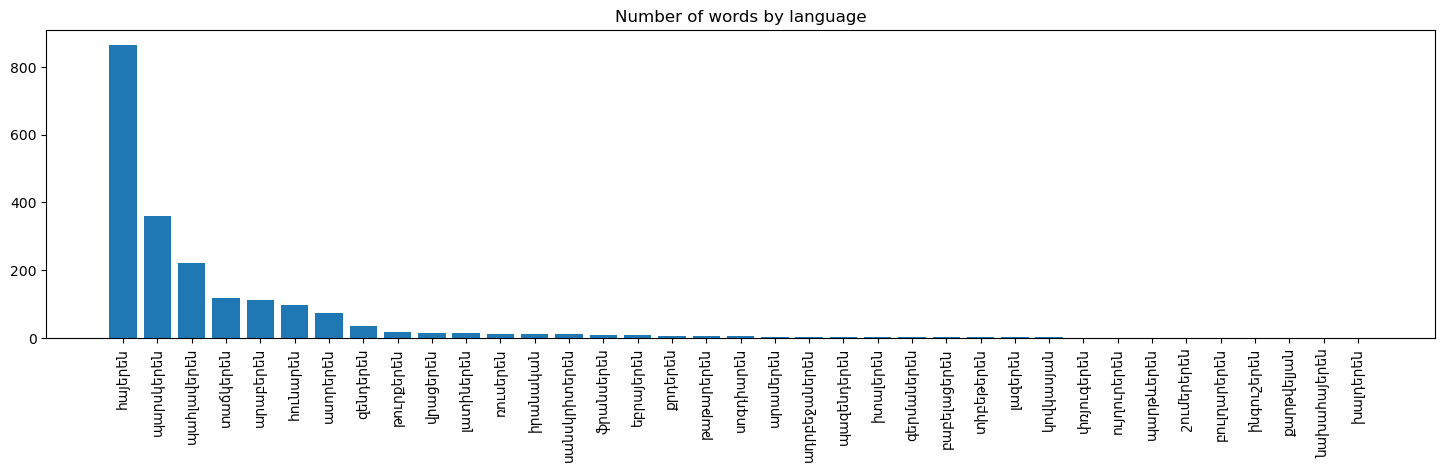

In [5]:
barplot(lang_counts, title='Number of words by language')

In [6]:
def build_syllable_set(data):
    syllable_set = set()
    for item in data:
        for variant in item['syllables']:
            syllable_set.update(variant.split())
    return syllable_set

In [7]:
loanword_syllable_set = build_syllable_set(loanword_data)
armenian_syllable_set = build_syllable_set(armenian_data)

loanword_syllable_list = list(loanword_syllable_set)
armenian_syllable_list = list(armenian_syllable_set)

print(f'{len(loanword_syllable_list)} loanword syllables', loanword_syllable_list[:15], '\n', sep='\n')
print(f'{len(armenian_syllable_list)} Armenian word syllables', armenian_syllable_list[:15], sep='\n')

828 loanword syllables
['նագ', 'տրու', 'սան', 'խի', 'մաստ', 'ցին', 'բաս', 'վեհ', 'րե', 'ս[ը]ր', 'ռաս', 'ռա', 'չա', 'դիք', 'համ']


795 Armenian word syllables
['ջով', 'սան', 'գեղձ', 'ն[ը]ր', 'ցին', 'մեջ', 'քատ', 'թուք', 'րե', 'ձեղկ', 'ս[ը]ր', 'ռաս', 'ռա', 'դիք', 'յուն']


In [8]:
def build_lang_set(data):
    lang_set = set()
    for item in data:
        for lang in item['langs']:
            lang_set.add(lang)
    return lang_set

In [9]:
lang_set = build_lang_set(loanword_data)
lang_list = list(lang_set) + ['հայերեն']

print(lang_set)

{'ինգուշերեն', 'շումերերեն', 'փռյուգերեն', 'եբրայերեն', 'պազենդերեն', 'հունարեն', 'թաթարերեն', 'խալդերեն', 'զենդերեն', 'լազերեն', 'ֆրանսերեն', 'պարթևերեն', 'ադրբեջաներեն', 'պահլավերեն', 'ռուսերեն', 'ասորերեն', 'տաճկերեն', 'տիբեթերեն', 'քարթվելյան', 'սոգդիարեն', 'իտալերեն', 'իրանական', 'թուրքերեն', 'գերմաներեն', 'ույղուրերեն', 'քրդերեն', 'արաբերեն', 'սանսկրիտերեն', 'լատիներեն', 'բուլղարերեն', 'նախահայերեն', 'վրացերեն', 'արամերեն', 'կովկասյան', 'պարսկերեն', 'բաբելացերեն'}


In [10]:
loanword_syllable_idx = {s: idx for idx, s in enumerate(loanword_syllable_list)}
armenian_syllable_idx = {s: idx for idx, s in enumerate(armenian_syllable_list)}
lang_idx = {l: idx for idx, l in enumerate(lang_list)}

loanword_syllable_list = np.array(loanword_syllable_list)
armenian_syllable_list = np.array(armenian_syllable_list)
lang_list = np.array(lang_list)

## Visualizing syllable frequencies

In [11]:
def build_syllable_lang_matrix(data, syllable_list, lang_list, word_syllable_idx):
    matrix = np.zeros((len(syllable_list), len(lang_list)))
    for datum in data:
        syllables = []
        for variant in datum['syllables']:
            syllables += variant.split()
        for syllable in syllables:
            for lang in datum['langs']:
                matrix[word_syllable_idx[syllable]][lang_idx[lang] % (len(lang_idx) - 1)] += 1
    return matrix

In [12]:
syllable_lang_matrix = build_syllable_lang_matrix(
    loanword_data,
    loanword_syllable_list,
    lang_list[:-1],
    loanword_syllable_idx
)

In [13]:
def significant_submatrix(matrix, threshold=3):
    significant_is = set()
    significant_js = set()
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] >= threshold:
                significant_is.add(i)
                significant_js.add(j)
    return np.array(sorted(significant_is)), np.array(sorted(significant_js))

In [14]:
sign_is, sign_js = significant_submatrix(syllable_lang_matrix)
len(sign_is), len(sign_js), sign_is, sign_js

(75,
 8,
 array([ 12,  19,  20,  21,  22,  47,  61,  64,  71,  88,  92, 112, 114,
        116, 118, 133, 147, 159, 167, 181, 195, 210, 221, 229, 265, 306,
        310, 315, 318, 328, 332, 340, 344, 346, 378, 395, 400, 402, 414,
        420, 426, 470, 473, 488, 493, 499, 504, 531, 532, 544, 569, 589,
        593, 596, 618, 619, 627, 628, 644, 650, 652, 657, 661, 667, 675,
        690, 691, 700, 716, 719, 725, 729, 782, 784, 822]),
 array([ 5, 13, 15, 16, 21, 25, 26, 34]))

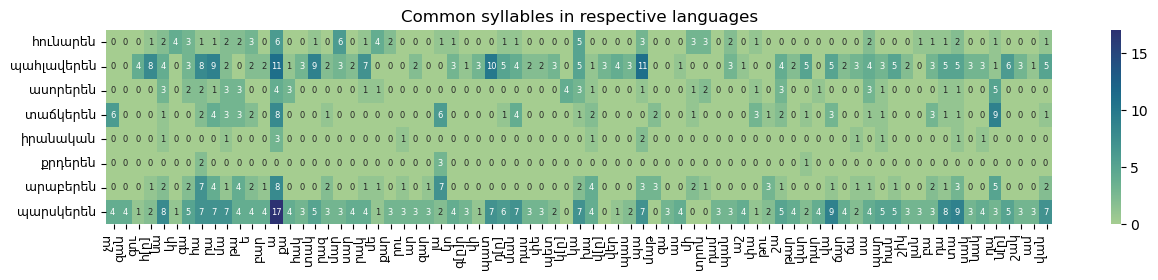

In [15]:
plot_heatmap(
    syllable_lang_matrix,
    loanword_syllable_list, lang_list,
    sign_is=sign_is, sign_js=sign_js,
    title='Common syllables in respective languages',
    fontsize=9
)

We note that syllables ա, տակ, տա, րա, պատ, պա dominate in պարսկերեն and պահլավերեն.

Sylllables ղա, չա dominate in տաճկերեն.

In [16]:
armenian_syllable_matrix = build_syllable_lang_matrix(
    armenian_data,
    armenian_syllable_list,
    lang_list[-1:],
    armenian_syllable_idx
)

sign_is, sign_js = significant_submatrix(armenian_syllable_matrix, threshold=5)
len(sign_is), len(sign_js), sign_is, sign_js

(58,
 1,
 array([  8,  22,  23,  28,  42,  47,  49,  51,  61,  78,  81,  83,  89,
         94,  96, 105, 109, 136, 140, 143, 156, 193, 201, 239, 242, 243,
        286, 290, 294, 313, 333, 341, 348, 374, 382, 445, 447, 464, 465,
        485, 486, 493, 502, 511, 548, 554, 601, 602, 610, 618, 657, 660,
        676, 677, 687, 722, 730, 775]),
 array([0]))

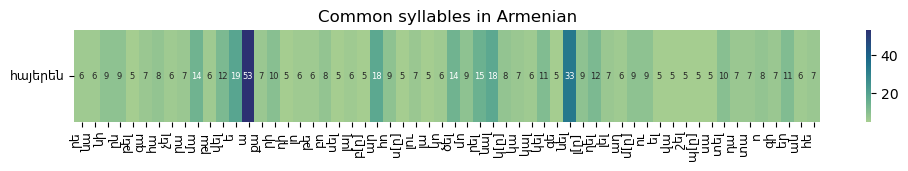

In [17]:
plot_heatmap(
    armenian_syllable_matrix,
    armenian_syllable_list, lang_list[-1:], 
    sign_is=sign_is, sign_js=sign_js,
    title='Common syllables in Armenian',
    fontsize=9
)

## Common syllables

In [18]:
common_syllable_set = armenian_syllable_set.intersection(loanword_syllable_set)
print(len(common_syllable_set), common_syllable_set, sep='\n')

233
{'թո', 'ղինձ', 'ծի', 'փուր', 'սան', 'բ[ը]լ', 'նիկ', 'մեն', 'ցին', 'կեն', 'դար', 'վա', 'ստան', 'րե', 'ս[ը]ր', 'ռաս', 'մե', 'ռա', 'դիք', 'ուս', 'հար', 'յուն', 'լալ', 'պե', 'զան', 'քար', 'ղո', 'հ[ը]', 'լավ', 'ռակ', 'նա', 'նի', 'բ[ը]', 'վազ', 'պ[ը]ղ', 'պ[ը]', 'րու', 'ռե', 'տյան', 'տիվ', 'րան', 'թեղ', 'մակ', 'ճա', 'թի', 'սա', 'տան', 'րուր', 'ձա', 'ղալ', 'թալ', 'զե', 'կյուն', 'րո', 'թ[ը]', 'շիվ', 'րախ', 'գո', 'ափ', 'պա', 'դ[ը]ր', 'նե', 'ջին', 'գ[ը]', 'թան', 'լան', 'կար', 'կաթ', 'զ[ը]', 'օ', 'գա', 'խո', 'հա', 'ար', 'ս[ը]', 'խալ', 'խան', 'դուզ', 'գե', 'դալ', 'մու', 'նել', 'րա', 'բա', 'դա', 'պալ', 'զա', 'րիկ', 'վե', 'նիք', 'զ[ը]մ', 'գալ', 'աս', 'քի', 'բուլ', 'մի', 'քուն', 'տար', 'տա', 'ո', 'սու', 'մա', 'թա', 'մոր', 'մայ', 'տ[ը]զ', 'փայ', 'տ[ը]ր', 'բամ', 'մարդ', 'թաք', 'լակ', 'փո', 'լել', 'մամ', 'ե', 'սե', 'նակ', 'բար', 'լա', 'ստա', 'ա', 'փող', 'քա', 'կո', 'ղա', 'ն[ը]', 'գ[ը]ր', 'տոր', 'թակ', 'կոր', 'դամ', 'ջ[ը]', 'րի', 'տի', 'մ[ը]', 'տո', 'դի', 'ալ', 'թեր', 'նաք', 'զի', 'բու', 'լաք', 'ի', '

For each language we find its syllable_set:

In [19]:
def syllable_set_of_lang(data, lang):
    res = set()
    for datum in data:
        if lang in datum['langs']:
            for variant in datum['syllables']:
                res.update(variant.split())
    return res

In [20]:
lang_syllable_list = {}

for lang in lang_list[:-1]:
    lang_syllable_list[lang] = syllable_set_of_lang(loanword_data, lang)
lang_syllable_list[lang_list[-1]] = syllable_set_of_lang(armenian_data, lang_list[-1])

In [21]:
def calculate_syllable_frequencies(lang_syllable_list):
    syllable_list_lens = {}
    for lang in lang_syllable_list.keys():
        syllable_list_lens[lang] = len(lang_syllable_list[lang])
    
    syllable_list_lens = list(sorted(syllable_list_lens.items(), key=lambda x: -x[1]))
    return dict(syllable_list_lens)

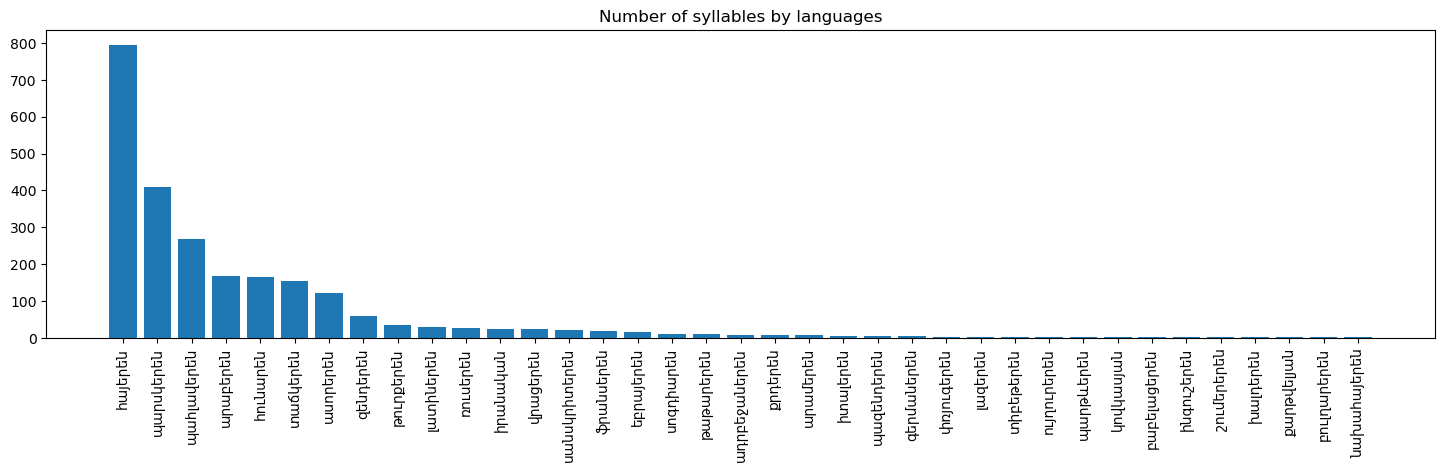

In [22]:
syllable_list_lens = calculate_syllable_frequencies(lang_syllable_list)
barplot(syllable_list_lens.items(), 'Number of syllables by languages')

For each language we intersect its syllable set with that of Armenian's:

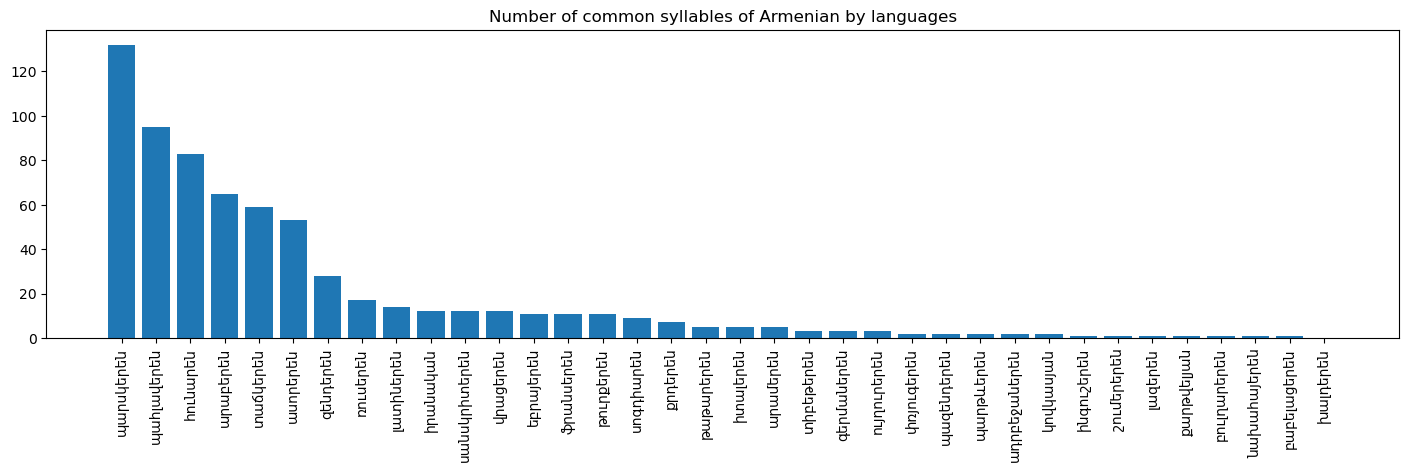

In [23]:
common_syllable_list = {}
for lang in lang_list[:-1]:
    common_syllable_list[lang] = lang_syllable_list[lang].intersection(armenian_syllable_set)

common_syllable_list_lens = calculate_syllable_frequencies(common_syllable_list)
barplot(common_syllable_list_lens.items(), 'Number of common syllables of Armenian by languages')

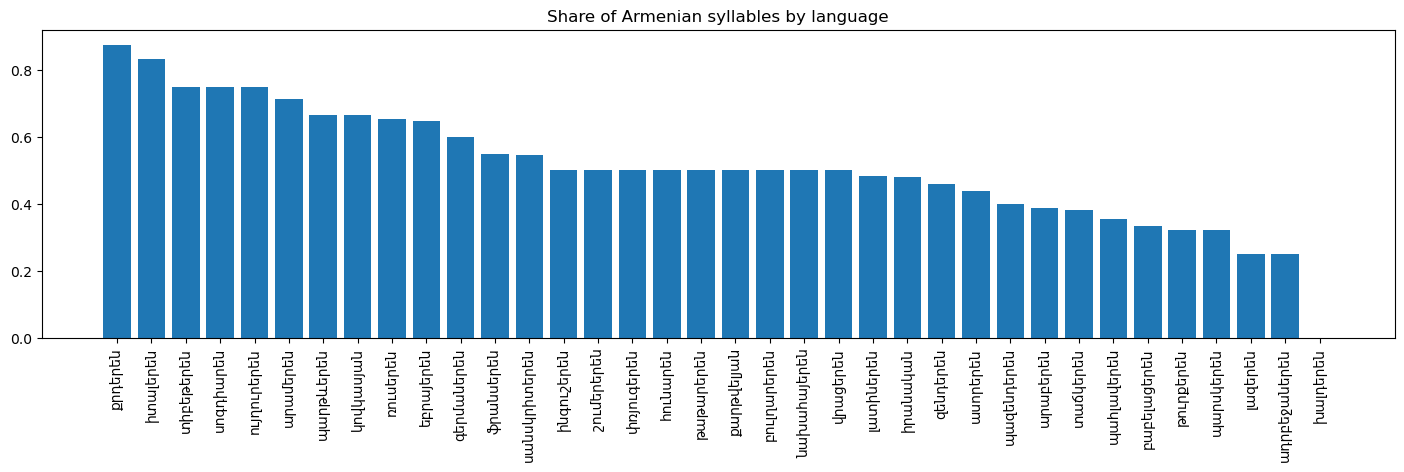

In [24]:
ratios = {lang: common_syllable_list_lens[lang] / syllable_list_lens[lang] for lang in lang_list[:-1]}
ratios = sorted(ratios.items(), key=lambda x: -x[1])

barplot(ratios, 'Share of Armenian syllables by language')

## Letter demographics

In [25]:
def split_word(word):
    letters = []
    i = 0
    while i < len(word) - 1:
        if word[i: i + 2] == 'ու':
            letters.append('ու')
            i += 2
        else:
            letters.append(word[i])
            i += 1
    if word[-1] != 'ւ':
        letters.append(word[-1])
    return letters

def get_lang_letter_freqs(data, lang):
    letter_freqs = {}
    for datum in data:
        if lang not in datum['langs']:
            continue
        for letter in split_word(datum['word']):
            if letter in letter_freqs.keys():
                letter_freqs[letter] += 1
            else:
                letter_freqs[letter] = 1
    return letter_freqs

In [26]:
lang_letter_freqs = {lang: get_lang_letter_freqs(loanword_data, lang) for lang in lang_list[:-1]}
lang_letter_freqs[lang_list[-1]] = get_lang_letter_freqs(armenian_data, lang_list[-1])

In [27]:
armenian_letters = ['ա', 'բ', 'գ', 'դ', 'ե', 'զ', 'է', 'ը',
                    'թ', 'ժ', 'ի', 'լ', 'խ', 'ծ', 'կ', 'հ',
                    'ձ', 'ղ', 'ճ', 'մ', 'յ', 'ն', 'շ', 'ո',
                    'չ', 'պ', 'ջ', 'ռ', 'ս', 'վ', 'տ', 'ր',
                    'ց', 'ու', 'փ', 'ք', 'և', 'օ', 'ֆ']

for lang in lang_list:
    for symbol in list(lang_letter_freqs[lang].keys()):
        if symbol not in armenian_letters:
            del lang_letter_freqs[lang][symbol]
    for letter in armenian_letters:
        if letter not in list(lang_letter_freqs[lang].keys()):
            lang_letter_freqs[lang][letter] = 0

In [28]:
lang_letter_df = pd.DataFrame.from_dict(lang_letter_freqs, orient='index')
lang_letter_df = lang_letter_df.reindex(sorted(lang_letter_df.columns), axis=1)
lang_letter_df.head()

,ա,բ,գ,դ,ե,զ,է,ը,թ,ժ,...,ս,վ,տ,ր,ց,փ,ք,օ,ֆ,և
ինգուշերեն,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
շումերերեն,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
փռյուգերեն,2,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
եբրայերեն,11,3,1,1,4,0,0,0,1,1,...,3,0,1,4,0,0,0,0,0,0
պազենդերեն,2,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


Since the number of words of each language vary vastly we normalize the letter frequencies by rows:

In [29]:
lang_letter_df_row_normed = lang_letter_df.div(lang_letter_df.sum(axis=1), axis=0)
lang_letter_df_row_normed.head()

,ա,բ,գ,դ,ե,զ,է,ը,թ,ժ,...,ս,վ,տ,ր,ց,փ,ք,օ,ֆ,և
ինգուշերեն,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
շումերերեն,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.200000,0.0,0.0,0.0
փռյուգերեն,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.166667,0.166667,0.166667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
եբրայերեն,0.250000,0.068182,0.022727,0.022727,0.090909,0.000000,0.0,0.0,0.022727,0.022727,...,0.068182,0.000000,0.022727,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0
պազենդերեն,0.142857,0.000000,0.000000,0.071429,0.000000,0.071429,0.0,0.0,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.071429,0.0,0.0,0.0


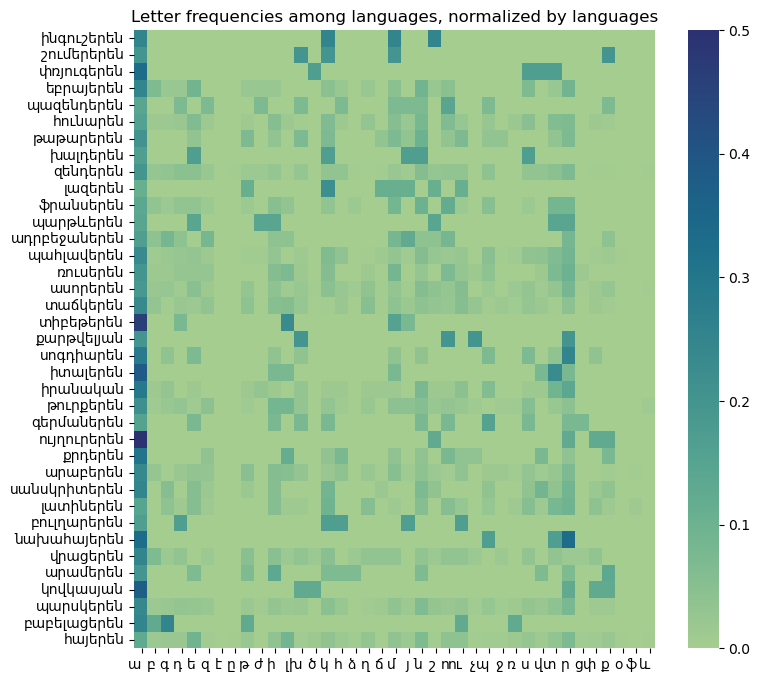

In [30]:
plot_heatmap(
    lang_letter_df_row_normed.T.to_numpy(),
    lang_letter_df_row_normed.columns, lang_letter_df_row_normed.index,
    title='Letter frequencies among languages, normalized by languages',
    annot=False, rotate_xticks=False
)

We take a closer look at the important languages:

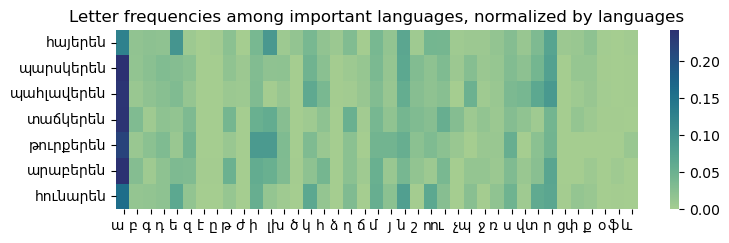

In [31]:
important_languages = ['հայերեն', 'պարսկերեն', 'պահլավերեն', 'տաճկերեն', 'թուրքերեն', 'արաբերեն', 'հունարեն']

plot_heatmap(
    lang_letter_df_row_normed.loc[important_languages].T.to_numpy(),
    np.array(lang_letter_df_row_normed.columns), np.array(important_languages),
    title='Letter frequencies among important languages, normalized by languages',
    annot=False, rotate_xticks=False
)

Now we normalize by columns instead of rows:

In [32]:
lang_letter_df_col_normed = lang_letter_df.div(lang_letter_df.sum(axis=0), axis=1)
lang_letter_df_col_normed.head()

,ա,բ,գ,դ,ե,զ,է,ը,թ,ժ,...,ս,վ,տ,ր,ց,փ,ք,օ,ֆ,և
ինգուշերեն,0.000552,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
շումերերեն,0.000552,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.006623,0.0,0.0,0.0
փռյուգերեն,0.001105,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.003333,0.005848,0.002604,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
եբրայերեն,0.006077,0.017241,0.005208,0.004566,0.007067,0.000000,0.0,0.0,0.004739,0.03125,...,0.010000,0.000000,0.002604,0.005587,0.0,0.0,0.000000,0.0,0.0,0.0
պազենդերեն,0.001105,0.000000,0.000000,0.004566,0.000000,0.006711,0.0,0.0,0.000000,0.03125,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.006623,0.0,0.0,0.0


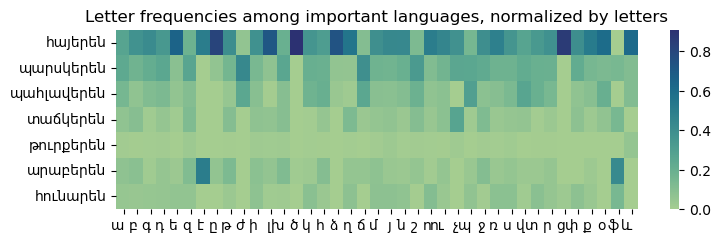

In [33]:
plot_heatmap(
    lang_letter_df_col_normed.loc[important_languages].T.to_numpy(),
    np.array(lang_letter_df_col_normed.columns), np.array(important_languages),
    title='Letter frequencies among important languages, normalized by letters',
    annot=False, rotate_xticks=False
)

We note that letters ժ, ճ, պ are characteristic to պարսկերեն and պահլավերեն, letters է and ֆ to արաբերեն, while letters ը, ծ, ձ, ց are definitive indicators of հայերեն.